In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Week 6

In [2]:
# ----------------------------------------------------------------------------------------------------

In [3]:
wards = pd.read_csv("data_sets/Wards_Offices.csv")
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [4]:
census = pd.read_csv("data_sets/Wards_Census.csv")
print(census.shape)
census.head()

(50, 6)


,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [5]:
taxi_owners = pd.read_pickle("data_sets/taxi_owners.p")
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [6]:
taxi_vehicles = pd.read_pickle("data_sets/taxi_vehicles.p")
taxi_vehicles.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [7]:
# Just merge() will do inner join
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on="vid")
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [8]:
taxi_own_veh = taxi_owners.merge(
    taxi_vehicles, on="vid", suffixes=["_own", "_veh"]
)
taxi_own_veh.head()

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [9]:
taxi_own_veh[["fuel_type"]].value_counts()

fuel_type             
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64

In [10]:
max(taxi_own_veh[["fuel_type"]].value_counts())

2792

In [11]:
# ----------------------------------------------------------------------------------------------------

In [12]:
wards_altered = pd.read_csv("data_sets/Wards_Offices_Altered.csv")
print(wards_altered.shape)
wards_altered.head()

(46, 4)


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [13]:
# census is (50, 6)
# wards_altered is (46, 4)
# But output will be (46, 9) becauser merge(inner join -> matchonly)
wards_census_altered = wards_altered.merge(census, on="ward")
print(wards_census_altered.shape)
wards_census_altered.head()

(46, 9)


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [14]:
# ----------------------------------------------------------------------------------------------------

In [15]:
licenses = pd.read_pickle("data_sets/licenses.p")
licenses.head(10)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613
5,10046,12,774,SUPERMERCADO EL GUERO #10 INC,4023 S ARCHER AVE 1ST,60632
6,10062,42,NaN,"LEVEL 3 COMMUNICATIONS, LLC",662 N HUDSON AVE,60610
7,10077,42,NaN,MITSUI & CO (U.S.A.)INC,200 E RANDOLPH ST 52ND,60601
8,10099,27,NaN,MEDIA PROCESS GROUP,1327 W WASHINGTON BLVD 103,60607
9,10128,10,864,RESERVE MARINE TERMINALS,12800 S BUTLER DR,60633


In [16]:
biz_owners = pd.read_pickle("data_sets/business_owners.p")
biz_owners.head(10)

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT
5,10005,CAROL,WARD,SECRETARY
6,10044,JESSICA,DEVOS,SECRETARY
7,10044,CURTIS,JENNETTE,PRESIDENT
8,10044,BRIAN,HAINES,VICE PRESIDENT
9,10046,RICARDO,GARCIA,PRESIDENT


In [17]:
# One to many merge
licenses_owners = licenses.merge(biz_owners, on="account")
licenses_owners.head(10)

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER
5,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,IRENE,ROSENFELD,PRESIDENT
6,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,CAROL,WARD,SECRETARY
7,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,JESSICA,DEVOS,SECRETARY
8,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,CURTIS,JENNETTE,PRESIDENT
9,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,BRIAN,HAINES,VICE PRESIDENT


In [18]:
count_df = licenses_owners.groupby("title").agg({"account": "count"})
count_df.head(10)

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [19]:
sorted_df = count_df.sort_values(by="account", ascending=False)
sorted_df.head(10)

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970
MEMBER,884
MANAGING MEMBER,878
SHAREHOLDER,590
PARTNER,451


In [20]:
# ----------------------------------------------------------------------------------------------------

In [21]:
cal = pd.read_pickle("data_sets/cta_calendar.p")
cal.head(10)

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday
5,2019,1,6,Sunday/Holiday
6,2019,1,7,Weekday
7,2019,1,8,Weekday
8,2019,1,9,Weekday
9,2019,1,10,Weekday


In [22]:
ridership = pd.read_pickle("data_sets/cta_ridership.p")
ridership.head(10)

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719
5,40010,2019,1,6,554
6,40010,2019,1,7,1714
7,40010,2019,1,8,1868
8,40010,2019,1,9,1811
9,40010,2019,1,10,1805


In [23]:
stations = pd.read_pickle("data_sets/stations.p")
stations.head(10)

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"
5,40060,Belmont-O'Hare,"(41.938132, -87.712359)"
6,40070,Jackson/Dearborn,"(41.878183, -87.629296)"
7,40080,Sheridan,"(41.953775, -87.654929)"
8,40090,Damen-Brown,"(41.966286, -87.678639)"
9,40100,Morse,"(42.008362, -87.665909)"


In [24]:
ridership_cal = ridership.merge(cal, on=["year", "month", "day"]).merge(
    stations, on="station_id"
)
ridership_cal.head(10)

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"
5,40010,2019,1,6,554,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
6,40010,2019,1,7,1714,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
7,40010,2019,1,8,1868,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
8,40010,2019,1,9,1811,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
9,40010,2019,1,10,1805,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"


In [25]:
filter_criteria = (
    (ridership_cal["station_name"] == "Wilson")
    & (ridership_cal["day_type"] == "Weekday")
    & (ridership_cal["month"] == 7)
)
filter_criteria

0       False
1       False
2       False
3       False
4       False
        ...  
3280    False
3281    False
3282    False
3283    False
3284    False
Length: 3285, dtype: bool

In [26]:
ridership_cal.loc[filter_criteria]

,station_id,year,month,day,rides,day_type,station_name,location
1641,40540,2019,7,1,6464,Weekday,Wilson,"(41.964273, -87.657588)"
1642,40540,2019,7,2,6491,Weekday,Wilson,"(41.964273, -87.657588)"
1643,40540,2019,7,3,6639,Weekday,Wilson,"(41.964273, -87.657588)"
1645,40540,2019,7,5,4794,Weekday,Wilson,"(41.964273, -87.657588)"
1648,40540,2019,7,8,6351,Weekday,Wilson,"(41.964273, -87.657588)"
1649,40540,2019,7,9,6483,Weekday,Wilson,"(41.964273, -87.657588)"
1650,40540,2019,7,10,6550,Weekday,Wilson,"(41.964273, -87.657588)"
1651,40540,2019,7,11,6591,Weekday,Wilson,"(41.964273, -87.657588)"
1652,40540,2019,7,12,6309,Weekday,Wilson,"(41.964273, -87.657588)"
1655,40540,2019,7,15,6298,Weekday,Wilson,"(41.964273, -87.657588)"


In [27]:
ridership_cal.loc[filter_criteria].agg({"rides": "sum"})

rides    140005
dtype: int64

In [28]:
movies = pd.read_pickle("data_sets/movies.p")
movies.head(10)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
5,49529,John Carter,43.926995,2012-03-07
6,75638,Red Lights,22.748174,2012-03-02
7,13785,Best in Show,10.982255,2000-09-19
8,20024,The End of the Affair,6.921263,1999-12-03
9,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12


In [29]:
financials = pd.read_pickle("data_sets/financials.p")
financials.head(10)

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08
5,559,258000000,8.908716e+08
6,38757,260000000,5.917949e+08
7,99861,280000000,1.405404e+09
8,767,250000000,9.339592e+08
9,209112,250000000,8.732602e+08


In [30]:
movies_financials = movies.merge(financials, on="id", how="left")
movies_financials.head(10)

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0
5,49529,John Carter,43.926995,2012-03-07,260000000.0,284139100.0
6,75638,Red Lights,22.748174,2012-03-02,14000000.0,13551174.0
7,13785,Best in Show,10.982255,2000-09-19,NaN,NaN
8,20024,The End of the Affair,6.921263,1999-12-03,23000000.0,10827816.0
9,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,NaN,NaN


In [31]:
# Q. Count the number of rows in movies_financials with a null value in the budget column
movies_financials[["budget"]].isnull().sum()

budget    1574
dtype: int64

In [32]:
# ----------------------------------------------------------------------------------------------------

In [33]:
toy_story = pd.read_csv("data_sets/toy_story.csv")
toy_story.head(10)

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995,16/6/2010
1,863,Toy Story 2,73.575,30/10/1999
2,862,Toy Story,73.640,30/10/1995


In [34]:
taglines = pd.read_pickle("data_sets/taglines.p")
taglines.head(10)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."
5,559,The battle within.
6,38757,They're taking adventure to new lengths.
7,99861,A New Age Has Come.
8,767,Dark Secrets Revealed
9,209112,Justice or revenge


In [35]:
toystory_tag = toy_story.merge(taglines, how="left", on="id")
toystory_tag.head(10)

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,16/6/2010,No toy gets left behind.
1,863,Toy Story 2,73.575,30/10/1999,The toys are back!
2,862,Toy Story,73.640,30/10/1995,NaN


In [36]:
print(toy_story.shape)
print(toy_story.dtypes)

(3, 4)
id                int64
title            object
popularity      float64
release_date     object
dtype: object


In [37]:
# Inner join
toystory_tag = toy_story.merge(taglines, on="id")
toystory_tag.head(10)

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,16/6/2010,No toy gets left behind.
1,863,Toy Story 2,73.575,30/10/1999,The toys are back!


In [38]:
print(toystory_tag.shape)
print(toystory_tag.dtypes)

(2, 5)
id                int64
title            object
popularity      float64
release_date     object
tagline          object
dtype: object


In [39]:
# ----------------------------------------------------------------------------------------------------

In [40]:
movies = pd.read_pickle("data_sets/movies.p")
movies.head(10)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
5,49529,John Carter,43.926995,2012-03-07
6,75638,Red Lights,22.748174,2012-03-02
7,13785,Best in Show,10.982255,2000-09-19
8,20024,The End of the Affair,6.921263,1999-12-03
9,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12


In [41]:
movie_to_genres = pd.read_pickle("data_sets/movie_to_genres.p")
movie_to_genres.head(10)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
5,12,Family
6,12,Animation
7,13,Comedy
8,13,Romance
9,13,Drama


In [42]:
scifi_only = movie_to_genres[movie_to_genres["genre"] == "Science Fiction"]
scifi_only.head(10)

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction
55,68,Science Fiction
66,74,Science Fiction
68,75,Science Fiction
74,78,Science Fiction
97,95,Science Fiction


In [43]:
action_movies = movie_to_genres[movie_to_genres["genre"] == "Action"]
action_movies.head(10)

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action
78,79,Action
85,85,Action
88,87,Action
90,89,Action
91,90,Action


In [44]:
action_scifi = action_movies.merge(scifi_only, how="right", on="movie_id")
action_scifi.head(10)

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction
7,75,NaN,Science Fiction
8,78,NaN,Science Fiction
9,95,Action,Science Fiction


In [45]:
action_scifi = action_movies.merge(
    scifi_only, how="right", on="movie_id", suffixes=["_act", "_sci"]
)
action_scifi.head(10)

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction
7,75,NaN,Science Fiction
8,78,NaN,Science Fiction
9,95,Action,Science Fiction


In [46]:
# Subnet where column is null
genre_act_null = action_scifi[action_scifi["genre_act"].isnull()]
genre_act_null.head(10)

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction
7,75,NaN,Science Fiction
8,78,NaN,Science Fiction
10,105,NaN,Science Fiction
12,149,NaN,Science Fiction
13,152,NaN,Science Fiction


In [47]:
movies.merge(scifi_only, left_on="id", how="inner", right_on="movie_id")

,id,title,popularity,release_date,movie_id,genre
0,49529,John Carter,43.926995,2012-03-07,49529,Science Fiction
1,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,Science Fiction
2,76757,Jupiter Ascending,85.369080,2015-02-04,76757,Science Fiction
3,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,Science Fiction
4,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,Science Fiction
...,...,...,...,...,...,...
530,5491,Battlefield Earth,7.891470,2000-05-10,5491,Science Fiction
531,1576,Resident Evil,40.715623,2002-03-15,1576,Science Fiction
532,13006,Split Second,4.857028,1992-05-01,13006,Science Fiction
533,11058,Godsend,12.102350,2004-04-30,11058,Science Fiction


In [48]:
# ----------------------------------------------------------------------------------------------------

In [49]:
pop_movies = pd.read_csv("data_sets/pop_movies.csv", index_col=0)
pop_movies.head(10)

,id,title,popularity,release_date
4546,211672,Minions,875.581,17/6/2015
4343,157336,Interstellar,724.248,5/11/2014
1966,293660,Deadpool,514.570,9/2/2016
2423,118340,Guardians of the Galaxy,481.099,30/7/2014
4220,76341,Mad Max: Fury Road,434.279,13/5/2015
1867,135397,Jurassic World,418.709,9/6/2015
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.973,9/7/2003
1106,119450,Dawn of the Planet of the Apes,243.792,26/6/2014
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227,18/11/2014
2614,177572,Big Hero 6,203.735,24/10/2014


In [50]:
movie_to_genre = pd.read_csv("data_sets/tdmb_movie_to_genres.csv")
movie_to_genre.head(10)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
5,12,Family
6,12,Animation
7,13,Comedy
8,13,Romance
9,13,Drama


In [51]:
genres_movies = movie_to_genre.merge(
    pop_movies, how="right", right_on="id", left_on="movie_id"
)
genres_movies.head(10)

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581,17/6/2015
1,211672,Adventure,211672,Minions,875.581,17/6/2015
2,211672,Animation,211672,Minions,875.581,17/6/2015
3,211672,Family,211672,Minions,875.581,17/6/2015
4,157336,Drama,157336,Interstellar,724.248,5/11/2014
5,157336,Science Fiction,157336,Interstellar,724.248,5/11/2014
6,157336,Adventure,157336,Interstellar,724.248,5/11/2014
7,293660,Adventure,293660,Deadpool,514.570,9/2/2016
8,293660,Action,293660,Deadpool,514.570,9/2/2016
9,293660,Comedy,293660,Deadpool,514.570,9/2/2016


In [52]:
genres_group = genres_movies.groupby(by="genre").agg({"id": "count"})
genres_group

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


<BarContainer object of 9 artists>

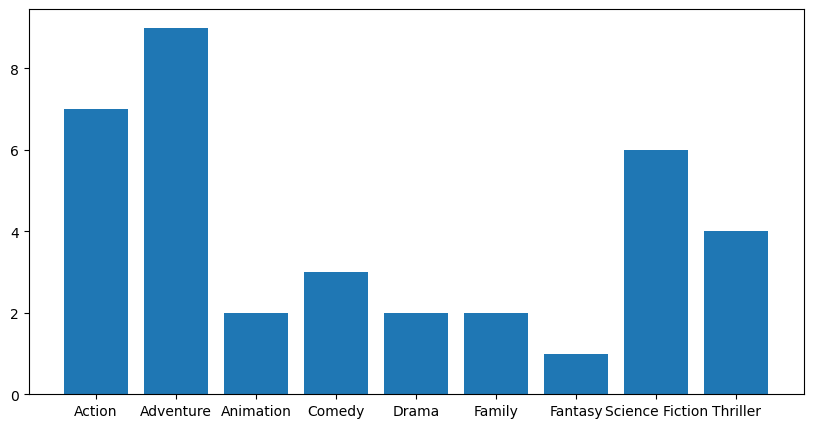

In [53]:
x = genres_group.index
plt.figure(figsize=(10, 5))
plt.bar(x, genres_group.id)

In [54]:
# ----------------------------------------------------------------------------------------------------

In [55]:
crews = pd.read_pickle("data_sets/crews.p")
crews

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron
...,...,...,...,...
129574,126186,Directing,Director,Daniel Hsia
129576,25975,Production,Executive Producer,Clark Peterson
129578,25975,Directing,Director,Brian Herzlinger
129579,25975,Directing,Director,Jon Gunn


In [56]:
crews_self_merged = crews.merge(
    crews, on="id", how="inner", suffixes=["_dir", "_crew"]
)

crews_self_merged.head(10)

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
5,19995,Editing,Editor,Stephen E. Rivkin,Art,Set Designer,Richard F. Mays
6,19995,Editing,Editor,Stephen E. Rivkin,Costume & Make-Up,Costume Design,Mayes C. Rubeo
7,19995,Editing,Editor,Stephen E. Rivkin,Camera,Director of Photography,Mauro Fiore
8,19995,Editing,Editor,Stephen E. Rivkin,Costume & Make-Up,Hairstylist,Linda DeVetta
9,19995,Editing,Editor,Stephen E. Rivkin,Crew,Visual Effects Editor,Steve R. Moore


In [57]:
# Boolean filter
boolean_filer = (crews_self_merged["job_dir"] == "Director") & (
    crews_self_merged["job_crew"] != "Director"
)
boolean_filer

0         False
1         False
2         False
3         False
4         False
          ...  
834189    False
834190     True
834191    False
834192    False
834193    False
Length: 834194, dtype: bool

In [58]:
direct_crew = crews_self_merged.loc[boolean_filer]
direct_crew.head(10)

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
162,19995,Directing,Director,James Cameron,Costume & Make-Up,Costume Design,Mayes C. Rubeo
163,19995,Directing,Director,James Cameron,Camera,Director of Photography,Mauro Fiore
164,19995,Directing,Director,James Cameron,Costume & Make-Up,Hairstylist,Linda DeVetta
165,19995,Directing,Director,James Cameron,Crew,Visual Effects Editor,Steve R. Moore
166,19995,Directing,Director,James Cameron,Art,Set Designer,Karl J. Martin


In [59]:
# ----------------------------------------------------------------------------------------------------

In [60]:
tracks_master = pd.read_csv("data_sets/tracks_master.csv")
tracks_master.head(10)

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [61]:
tracks_ride = pd.read_csv("data_sets/tracks_ride.csv")
tracks_ride.head(10)

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [62]:
tracks_st = pd.read_csv("data_sets/tracks_st.csv")
tracks_st

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


In [63]:
pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


In [64]:
pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True)

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99
3,1874,Fight Fire With Fire,154,1,3,NaN,0.99
4,1875,Ride The Lightning,154,1,3,NaN,0.99
5,1876,For Whom The Bell Tolls,154,1,3,NaN,0.99
6,1877,Fade To Black,154,1,3,NaN,0.99
7,1878,Trapped Under Ice,154,1,3,NaN,0.99
8,1882,Frantic,155,1,3,NaN,0.99
9,1883,St. Anger,155,1,3,NaN,0.99


In [65]:
pd.concat([tracks_master, tracks_ride, tracks_st], sort=True, join="inner")

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


In [66]:
# ----------------------------------------------------------------------------------------------------

In [67]:
inv_jul = pd.read_csv("data_sets/inv_jul.csv")
inv_aug = pd.read_csv("data_sets/inv_aug.csv")
inv_sep = pd.read_csv("data_sets/inv_sep.csv")

# add key
avg_inv_by_month = pd.concat(
    [inv_jul, inv_aug, inv_sep], keys=["7jul", "8aug", "9sep"], sort=True
)

avg_inv_by_month

bill_ctry  cid  iid invoice_date  total
7jul 0           Sweden   51   42     6/7/2009   1.98
     1               UK   53   43     6/7/2009   1.98
     2        Australia   55   44     7/7/2009   3.96
     3            India   59   45     8/7/2009   5.94
     4   Czech Republic    6   46    11/7/2009   8.91
...                 ...  ...  ...          ...    ...
9sep 28          Canada   29  387     3/9/2013   3.96
     29          Canada   33  388     4/9/2013   5.94
     30          France   39  389     7/9/2013   8.91
     31     Netherlands   48  390    12/9/2013  13.86
     32          Canada    3  391    20/9/2013   0.99

[103 rows x 5 columns]

In [68]:
avg_inv_by_month_group = avg_inv_by_month.groupby(level=0).agg(
    {"total": "mean"}
)
avg_inv_by_month_group

,total
7jul,5.431429
8aug,5.660000
9sep,5.945455


<Axes: >

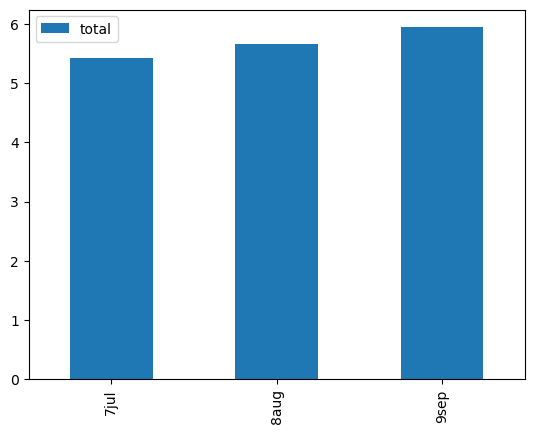

In [69]:
avg_inv_by_month_group.plot(kind="bar")

In [70]:
# ----------------------------------------------------------------------------------------------------

In [83]:
sp500 = pd.read_csv("data_sets/S&P500.csv")
sp500

,date,returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [72]:
gdp = pd.read_csv("data_sets/GDP.csv", index_col=0)
gdp.head(10)

,country code,year,gdp
3,USA,2010,1.500000e+13
7,USA,2011,1.550000e+13
11,USA,2012,1.620000e+13
15,USA,2012,1.620000e+13
19,USA,2013,1.680000e+13
23,USA,2014,1.750000e+13
27,USA,2015,1.820000e+13
31,USA,2016,1.870000e+13
35,USA,2017,1.950000e+13
39,USA,2018,2.050000e+13


In [73]:
gdp_sp500 = pd.merge_ordered(
    sp500, gdp, how="left", right_on="year", left_on="date"
)
gdp_sp500.head(10)

,date,returns,country code,year,gdp
0,2008,-38.49,NaN,NaN,NaN
1,2009,23.45,NaN,NaN,NaN
2,2010,12.78,USA,2010.0,1.500000e+13
3,2011,0.00,USA,2011.0,1.550000e+13
4,2012,13.41,USA,2012.0,1.620000e+13
5,2012,13.41,USA,2012.0,1.620000e+13
6,2013,29.60,USA,2013.0,1.680000e+13
7,2014,11.39,USA,2014.0,1.750000e+13
8,2015,-0.73,USA,2015.0,1.820000e+13
9,2016,9.54,USA,2016.0,1.870000e+13


In [74]:
gdp_sp500[gdp_sp500["year"] == 2018]

,date,returns,country code,year,gdp


In [87]:
# ffill -> Filling missing values with previous value
gdp_sp500 = pd.merge_ordered(
    gdp, sp500, how="left", right_on="date", left_on="year", fill_method="ffill"
)
gdp_sp500

,country code,year,gdp,date,returns
0,USA,2010,1.500000e+13,2010,12.78
1,USA,2011,1.550000e+13,2011,0.00
2,USA,2012,1.620000e+13,2012,13.41
3,USA,2012,1.620000e+13,2012,13.41
4,USA,2013,1.680000e+13,2013,29.60
5,USA,2014,1.750000e+13,2014,11.39
6,USA,2015,1.820000e+13,2015,-0.73
7,USA,2016,1.870000e+13,2016,9.54
8,USA,2017,1.950000e+13,2017,19.42
9,USA,2018,2.050000e+13,2017,19.42


In [88]:
gdp_sp500[gdp_sp500["year"] == 2018]

,country code,year,gdp,date,returns
9,USA,2018,2.050000e+13,2017,19.42


In [92]:
gdp_returns = gdp_sp500[["gdp", "returns"]]
gdp_returns

,gdp,returns
0,1.500000e+13,12.78
1,1.550000e+13,0.00
2,1.620000e+13,13.41
3,1.620000e+13,13.41
4,1.680000e+13,29.60
5,1.750000e+13,11.39
6,1.820000e+13,-0.73
7,1.870000e+13,9.54
8,1.950000e+13,19.42
9,2.050000e+13,19.42


In [93]:
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.220321
returns,0.220321,1.000000


In [94]:
# ----------------------------------------------------------------------------------------------------

In [95]:
inflation = pd.read_csv("data_sets/inflation.csv")
unemployment = pd.read_csv("data_sets/unemployment.csv")

In [97]:
inflation.head(10)

,date,cpi,seriesid,data_type
0,1/1/2014,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,1/2/2014,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,1/3/2014,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,1/4/2014,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,1/5/2014,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
5,1/6/2014,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
6,1/7/2014,237.498,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
7,1/8/2014,237.460,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
8,1/9/2014,237.477,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
9,1/10/2014,237.430,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [98]:
unemployment.head(10)

,date,unemployment_rate
0,1/6/2013,7.5
1,1/1/2014,6.7
2,1/6/2014,6.1
3,1/1/2015,5.6
4,1/6/2015,5.3
5,1/1/2016,5.0
6,1/6/2016,4.9
7,1/1/2017,4.7
8,1/6/2017,4.3
9,1/1/2018,4.1


In [100]:
inflation_unemploy = pd.merge_ordered(
    unemployment, inflation, on="date", how="inner"
)
inflation_unemploy.head(10)

,date,unemployment_rate,cpi,seriesid,data_type
0,1/1/2014,6.7,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,1/1/2015,5.6,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,1/1/2016,5.0,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,1/1/2017,4.7,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,1/1/2018,4.1,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
5,1/6/2014,6.1,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
6,1/6/2015,5.3,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
7,1/6/2016,4.9,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
8,1/6/2017,4.3,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
9,1/6/2018,4.0,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


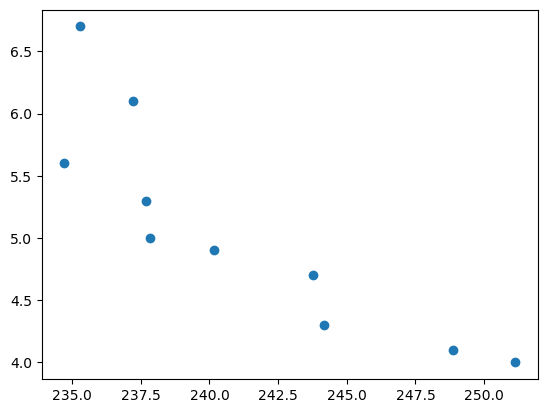

In [102]:
plt.scatter(x=inflation_unemploy.cpi, y=inflation_unemploy.unemployment_rate)

In [103]:
a = inflation_unemploy[["cpi", "unemployment_rate"]]
a.corr()

,cpi,unemployment_rate
cpi,1.000000,-0.868388
unemployment_rate,-0.868388,1.000000


# Week 7

What is statistics?
    • The field of statistics – the practice and study of collecting and analyzing data.
    • A summary statistics – a fact about or summary of some data.

What can statistics do?
    • How likely is someone to purchase a product? Are people more likely to purchase it if they can use a different payment system?
    • A/B testing


What can’t statistics do?
    These questions are hard to answer
    - Why is Game of Thrones so popular?
    - Are series with more violent scenes viewed by more people?
    
Quantitative data -> counted, measured, and numbers.
    Continuous (Measured)
        - Airplane spped
        - Time spent on waiting in line
    Discrete (Counted)
        - Number of pets
        - Number of pakages
        
Qualitative data -> observed but not measured.

    Nominal (Unordered)
        - Married/unmarried -> 1/0
        - Country, residence -> 1, 2, 3, etc...
        
    Ordinal (Ordered)
        0 Strong
        1 Normal
        2 Weak

Categorical data can be represeneted as numbers


Measure of center could be in 3 way:

    1. Mean -> np.mea(msleep["as"])
    
    2. Median -> np.median(msleep["asda"])
    
    3. Mode: 
        import statistics 
        statistics.mode (msleep ['vore'])
        
Left-skewed -> mean less than median
Right-skewed -> mean greater than median

In [136]:
# ----------------------------------------------------------------------------------------------------

In [106]:
food_consumption = pd.read_csv("data_sets/food_consumption.csv", index_col=0)
food_consumption.head(10)

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96
6,Argentina,eggs,11.39,10.46
7,Argentina,dairy,195.08,277.87
8,Argentina,wheat,103.11,19.66
9,Argentina,rice,8.77,11.22
10,Argentina,soybeans,0.00,0.00


In [108]:
belgium = food_consumption[food_consumption["country"] == "Belgium"]
belgium.head(10)

,country,food_category,consumption,co2_emission
397,Belgium,pork,38.65,136.80
398,Belgium,poultry,12.20,13.11
399,Belgium,beef,15.63,482.31
400,Belgium,lamb_goat,1.32,46.23
401,Belgium,fish,18.97,30.29
402,Belgium,eggs,12.59,11.57
403,Belgium,dairy,236.19,336.43
404,Belgium,wheat,111.91,21.34
405,Belgium,rice,8.61,11.02
406,Belgium,soybeans,0.07,0.03


In [110]:
usa = food_consumption[food_consumption["country"] == "USA"]
usa.head(10)

,country,food_category,consumption,co2_emission
56,USA,pork,27.64,97.83
57,USA,poultry,50.01,53.72
58,USA,beef,36.24,1118.29
59,USA,lamb_goat,0.43,15.06
60,USA,fish,12.35,19.72
61,USA,eggs,14.58,13.39
62,USA,dairy,254.69,362.78
63,USA,wheat,80.43,15.34
64,USA,rice,6.88,8.80
65,USA,soybeans,0.04,0.02


In [117]:
usa[["consumption", "co2_emission"]].agg([np.mean, np.median])

,consumption,co2_emission
mean,44.65,156.26
median,14.58,15.34


In [118]:
belgium[["consumption", "co2_emission"]].agg([np.mean, np.median])

,consumption,co2_emission
mean,42.132727,100.19
median,12.590000,21.34


In [135]:
bel_us = food_consumption[
    (food_consumption["country"] == "Belgium")
    | (food_consumption["country"] == "USA")
]

bel_us.groupby("country")[["consumption", "co2_emission"]].agg(
    [np.mean, np.median]
)

consumption        co2_emission       
               mean median         mean median
country                                       
Belgium   42.132727  12.59       100.19  21.34
USA       44.650000  14.58       156.26  15.34

In [137]:
# ----------------------------------------------------------------------------------------------------

In [142]:
rice_consumption = food_consumption[food_consumption["food_category"] == "rice"]
rice_consumption.head(10)

,country,food_category,consumption,co2_emission
9,Argentina,rice,8.77,11.22
20,Australia,rice,11.03,14.12
31,Albania,rice,7.78,9.96
42,Iceland,rice,3.89,4.98
53,New Zealand,rice,9.16,11.72
64,USA,rice,6.88,8.80
75,Uruguay,rice,11.50,14.72
86,Luxembourg,rice,4.20,5.37
97,Brazil,rice,32.13,41.12
108,Kazakhstan,rice,7.32,9.37


<Axes: >

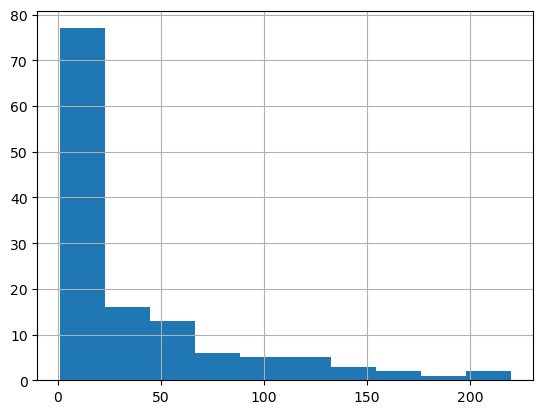

In [148]:
# .hist() gives grids
rice_consumption["co2_emission"].hist()

# Right-skwed -> mean is greater than median

In [149]:
rice_consumption["co2_emission"].agg([np.mean, np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64